# <span style="color:darkblue"> QTM 151 - Quiz 4 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [ ]:
# Write your answer here

print("Derry Li")


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [ ]:
# Write your answer here:
print("I will abide by Emory's Code of Conduct")

<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [2]:
# Write your answer here
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import ticker
import matplotlib.dates as mdates



<font size = "5">

In this quiz you will work with data on exchange rates, <br>
for the following currencies:

- 1 euro (EUR) to dollar (USD)
- 1 pound (GPB) to dollar (USD).


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import the dataset "currencies.csv"
- Parse the "date_string" column with ```pd.to_datetime()```
- To get full points, set the "format" option using wildcards as in Lecture 16.


In [47]:
# Write your own code
currencies = pd.read_csv("data_raw/currencies.csv")
currencies['date_string_dt'] = pd.to_datetime(currencies["date_string"], format = "%A, %b %d, %Y")

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Create a line plot plot which has the "gbp_to_usd" and "eur_to_usd" on the y-axis <br>
and the date on the x-axis
- Label the x-axis, the y-axis, and the title
- Add a legend and set the names to "1 Euro to USD" and "1 GPB to USD"

Hint: See Lecture 18 for how to plot multiple columns <br>
Hint: Remember to include the legend names as a list ```[...]```


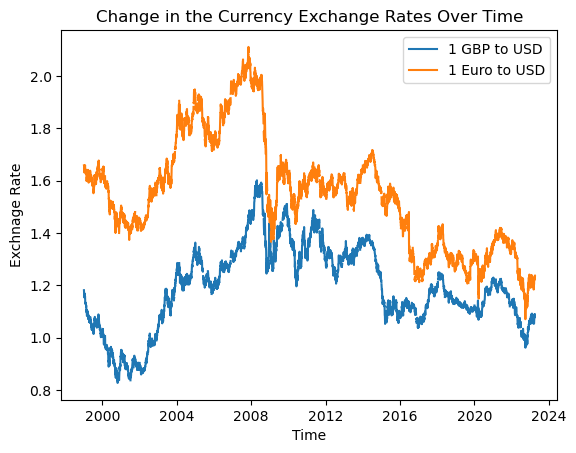

In [13]:
# Write your own code
plt.plot("date_string_dt", "gbp_to_usd",
          data = currencies)
plt.plot("date_string_dt", "eur_to_usd",
          data = currencies)
plt.xlabel("Time")
plt.ylabel("Exchnage Rate")
plt.title("Change in the Currency Exchange Rates Over Time")
plt.legend(["1 GBP to USD","1 Euro to USD"])


<font size = "5">

(c) Compute growth rates

<font size = "3">

- Calculate a new column "growth_euro" which computes the percentage daily <br>
growth rate of "eur_to_usd".

Hint: Use ```.diff()``` and ```.shift(1)```

In [15]:
# Write your own code
currencies["growth_euro"] = (currencies["eur_to_usd"].diff() / currencies["eur_to_usd"].shift(1) )* 100



<font size = "5">

(d) Flag subset of data and plot

<font size = "3">

- Create a boolean colum (True/False) "bool_cond" which checks whether <br>
"growth_euro" had a value greater than 2 or less than -2
- Generate a line plot with the "growth_euro" series, label the axes and the title
- Use the command ```plt.fill_between()``` as in Lecture 18 to create a shaded region <br>
for time periods where "bool_cond" is true.



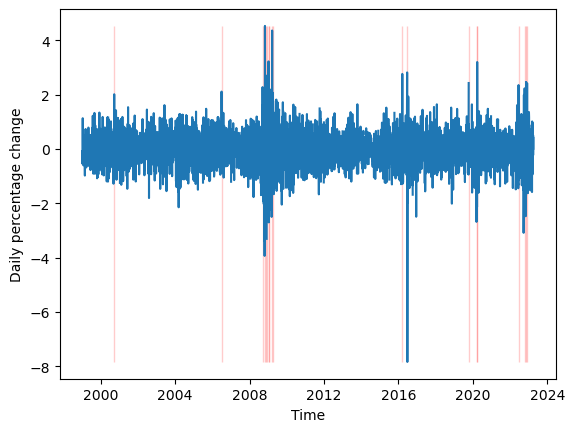

In [33]:
currencies["bool_cond"] = currencies["growth_euro"] > 2
plt.plot("date_string_dt", "growth_euro", data = currencies)
plt.xlabel("Time")
plt.ylabel("Daily percentage change")

vec_y = currencies["growth_euro"]
plt.fill_between(x= currencies["date_string_dt"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = currencies["bool_cond"],
                 alpha = 0.2,color = "red")

plt.show()

<font size = "5">

(e) Aggregate dataset by time period

<font size = "3">

- Create an object "month_config" that uses ```pd.Grouper()```, setting the key to <br>
the column "date" and freq to "m" (month)
- Follow the instructions in Lecture 16 to compute an aggregate dataset <br>
by month which computes the standard deviation of "eur_to_usd"
- Display the dataset




In [43]:
# Write your own code
month_config = pd.Grouper(key='date_string_dt', freq='m')
monthlydata = currencies.groupby(month_config).agg(std_exchange = ("eur_to_usd","std")).reset_index
monthlydata



C:\Users\derry\AppData\Local\Temp\ipykernel_3584\3646908693.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_config = pd.Grouper(key='date_string_dt', freq='m')


<bound method DataFrame.reset_index of                 std_exchange
date_string_dt              
1999-01-31          0.007345
1999-02-28          0.013345
1999-03-31          0.010475
1999-04-30          0.006172
1999-05-31          0.013046
...                      ...
2022-11-30          0.027308
2022-12-31          0.011389
2023-01-31          0.015046
2023-02-28          0.008972
2023-03-31          0.016246

[291 rows x 1 columns]>

<font size = "5">

(f) Convert a dataset to long format

<font size = "3">

- Convert the currencies dataset to long format using the following inputs

```
var_name   = "type",
value_name = "exchange_rate",
id_vars    = "date",
value_vars = ["eur_to_usd","gbp_to_usd"]
```

- Display the dataset

Hint: See Lecture 18 for details on ```pd.melt()```

In [42]:
# Write your own code
currencies_long = pd.melt(currencies,
                         var_name = "type",
                         value_name = "exchange_rate",

                         id_vars="date_string",
                         value_vars=["eur_to_usd", "gbp_to_usd"])
currencies_long


,date_string,type,exchange_rate
0,"Monday, Jan 04, 1999",eur_to_usd,1.6581
1,"Tuesday, Jan 05, 1999",eur_to_usd,1.6566
2,"Wednesday, Jan 06, 1999",eur_to_usd,1.6547
3,"Thursday, Jan 07, 1999",eur_to_usd,1.6495
4,"Friday, Jan 08, 1999",eur_to_usd,1.6405
...,...,...,...
12645,"Monday, Mar 27, 2023",gbp_to_usd,1.0789
12646,"Tuesday, Mar 28, 2023",gbp_to_usd,1.0844
12647,"Wednesday, Mar 29, 2023",gbp_to_usd,1.0826
12648,"Thursday, Mar 30, 2023",gbp_to_usd,1.0899
